In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import category_encoders as ce

In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [5]:
data=pd.read_csv('/content/CarPrice.csv')
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.shape

(205, 25)

In [8]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
print(data.CarName.value_counts())
print(data.fueltype.value_counts())
print(data.aspiration.value_counts())
print(data.carbody.value_counts())
print(data.drivewheel.value_counts())
print(data.enginelocation.value_counts())
print(data.enginetype.value_counts())
print(data.fuelsystem.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [11]:
data.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
data.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
data.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)
data.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)
data.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
data.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)
data.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)

In [12]:
data_enc=pd.DataFrame({'CarName':['alfa-romero giulia','alfa-romero stelvio','alfa-romero Quadrifoglio','audi 100 ls','audi 100ls','audi fox','audi 100ls','audi 5000','audi 4000','audi 5000s (diesel)','bmw 320i','bmw 320i','bmw x1','bmw x3','bmw z4','bmw x4','bmw x5','bmw x3','chevrolet impala','chevrolet monte carlo','chevrolet vega 2300','dodge rampage','dodge challenger se','dodge d200','dodge monaco (sw)','dodge colt hardtop','dodge colt (sw)','dodge coronet custom','dodge dart custom','dodge coronet custom (sw)','honda civic','honda civic cvcc','honda civic','honda accord cvcc','honda civic cvcc','honda accord lx','honda civic 1500 gl','honda accord','honda civic 1300','honda prelude','honda accord','honda civic','honda civic (auto)','isuzu MU-X','isuzu D-Max ','isuzu D-Max V-Cross','isuzu D-Max ','jaguar xj','jaguar xf','jaguar xk','maxda rx3','maxda glc deluxe','mazda rx2 coupe','mazda rx-4','mazda glc deluxe','mazda 626','mazda glc','mazda rx-7 gs','mazda glc 4','mazda 626','mazda glc custom l','mazda glc custom','mazda rx-4','mazda glc deluxe','mazda 626','mazda glc','mazda rx-7 gs','buick electra 225 custom','buick century luxus (sw)','buick century','buick skyhawk','buick opel isuzu deluxe','buick skylark','buick century special','buick regal sport coupe (turbo)','mercury cougar','mitsubishi mirage','mitsubishi lancer','mitsubishi outlander','mitsubishi g4','mitsubishi mirage g4','mitsubishi g4','mitsubishi outlander','mitsubishi g4','mitsubishi mirage g4','mitsubishi montero','mitsubishi pajero','mitsubishi outlander','mitsubishi mirage g4','Nissan versa','nissan gt-r','nissan rogue','nissan latio','nissan titan','nissan leaf','nissan juke','nissan latio','nissan note','nissan clipper','nissan rogue','nissan nv200','nissan dayz','nissan fuga','nissan otti','nissan teana','nissan kicks','nissan clipper','peugeot 504','peugeot 304','peugeot 504 (sw)','peugeot 504','peugeot 504','peugeot 604sl','peugeot 504','peugeot 505s turbo diesel','peugeot 504','peugeot 504','peugeot 604sl','plymouth fury iii','plymouth cricket','plymouth fury iii','plymouth satellite custom (sw)','plymouth fury gran sedan','plymouth valiant','plymouth duster','porsche macan','porcshce panamera','porsche cayenne','porsche boxter','porsche cayenne','renault 12tl','renault 5 gtl','saab 99e','saab 99le','saab 99le','saab 99gle','saab 99gle','saab 99e','subaru','subaru dl','subaru dl','subaru','subaru brz','subaru baja','subaru r1','subaru r2','subaru trezia','subaru tribeca','subaru dl','subaru dl','toyota corona mark ii','toyota corona','toyota corolla 1200','toyota corona hardtop','toyota corolla 1600 (sw)','toyota carina','toyota mark ii','toyota corolla 1200','toyota corona','toyota corolla','toyota corona','toyota corolla','toyota mark ii','toyota corolla liftback','toyota corona','toyota celica gt liftback','toyota corolla tercel','toyota corona liftback','toyota corolla','toyota starlet','toyota tercel','toyota corolla','toyota cressida','toyota corolla','toyota celica gt','toyota corona','toyota corolla','toyota mark ii','toyota corolla liftback','toyota corona','toyota starlet','toyouta tercel','vokswagen rabbit','volkswagen 1131 deluxe sedan','volkswagen model 111','volkswagen type 3','volkswagen 411 (sw)','volkswagen super beetle','volkswagen dasher','vw dasher','vw rabbit','volkswagen rabbit','volkswagen rabbit custom','volkswagen dasher','volvo 145e (sw)','volvo 144ea','volvo 244dl','volvo 245','volvo 264gl','volvo diesel','volvo 145e (sw)','volvo 144ea','volvo 244dl','volvo 246','volvo 264gl']})
encoder=ce.OneHotEncoder(cols='CarName',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(data_enc)
data_encoded

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_alfa-romero Quadrifoglio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi fox,CarName_audi 5000,CarName_audi 4000,CarName_audi 5000s (diesel),CarName_bmw 320i,...,CarName_vw rabbit,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volvo 145e (sw),CarName_volvo 144ea,CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 264gl,CarName_volvo diesel,CarName_volvo 246
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
data=pd.read_csv('CarPrice.csv')
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [17]:
print(data.CarName.value_counts())
print(data.fueltype.value_counts())
print(data.aspiration.value_counts())
print(data.carbody.value_counts())
print(data.drivewheel.value_counts())
print(data.enginelocation.value_counts())
print(data.enginetype.value_counts())
print(data.fuelsystem.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [18]:
data.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
data.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
data.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)
data.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)
data.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
data.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)
data.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)

In [19]:
data_enc=pd.DataFrame({'CarName':['alfa-romero giulia','alfa-romero stelvio','alfa-romero Quadrifoglio','audi 100 ls','audi 100ls','audi fox','audi 100ls','audi 5000','audi 4000','audi 5000s (diesel)','bmw 320i','bmw 320i','bmw x1','bmw x3','bmw z4','bmw x4','bmw x5','bmw x3','chevrolet impala','chevrolet monte carlo','chevrolet vega 2300','dodge rampage','dodge challenger se','dodge d200','dodge monaco (sw)','dodge colt hardtop','dodge colt (sw)','dodge coronet custom','dodge dart custom','dodge coronet custom (sw)','honda civic','honda civic cvcc','honda civic','honda accord cvcc','honda civic cvcc','honda accord lx','honda civic 1500 gl','honda accord','honda civic 1300','honda prelude','honda accord','honda civic','honda civic (auto)','isuzu MU-X','isuzu D-Max ','isuzu D-Max V-Cross','isuzu D-Max ','jaguar xj','jaguar xf','jaguar xk','maxda rx3','maxda glc deluxe','mazda rx2 coupe','mazda rx-4','mazda glc deluxe','mazda 626','mazda glc','mazda rx-7 gs','mazda glc 4','mazda 626','mazda glc custom l','mazda glc custom','mazda rx-4','mazda glc deluxe','mazda 626','mazda glc','mazda rx-7 gs','buick electra 225 custom','buick century luxus (sw)','buick century','buick skyhawk','buick opel isuzu deluxe','buick skylark','buick century special','buick regal sport coupe (turbo)','mercury cougar','mitsubishi mirage','mitsubishi lancer','mitsubishi outlander','mitsubishi g4','mitsubishi mirage g4','mitsubishi g4','mitsubishi outlander','mitsubishi g4','mitsubishi mirage g4','mitsubishi montero','mitsubishi pajero','mitsubishi outlander','mitsubishi mirage g4','Nissan versa','nissan gt-r','nissan rogue','nissan latio','nissan titan','nissan leaf','nissan juke','nissan latio','nissan note','nissan clipper','nissan rogue','nissan nv200','nissan dayz','nissan fuga','nissan otti','nissan teana','nissan kicks','nissan clipper','peugeot 504','peugeot 304','peugeot 504 (sw)','peugeot 504','peugeot 504','peugeot 604sl','peugeot 504','peugeot 505s turbo diesel','peugeot 504','peugeot 504','peugeot 604sl','plymouth fury iii','plymouth cricket','plymouth fury iii','plymouth satellite custom (sw)','plymouth fury gran sedan','plymouth valiant','plymouth duster','porsche macan','porcshce panamera','porsche cayenne','porsche boxter','porsche cayenne','renault 12tl','renault 5 gtl','saab 99e','saab 99le','saab 99le','saab 99gle','saab 99gle','saab 99e','subaru','subaru dl','subaru dl','subaru','subaru brz','subaru baja','subaru r1','subaru r2','subaru trezia','subaru tribeca','subaru dl','subaru dl','toyota corona mark ii','toyota corona','toyota corolla 1200','toyota corona hardtop','toyota corolla 1600 (sw)','toyota carina','toyota mark ii','toyota corolla 1200','toyota corona','toyota corolla','toyota corona','toyota corolla','toyota mark ii','toyota corolla liftback','toyota corona','toyota celica gt liftback','toyota corolla tercel','toyota corona liftback','toyota corolla','toyota starlet','toyota tercel','toyota corolla','toyota cressida','toyota corolla','toyota celica gt','toyota corona','toyota corolla','toyota mark ii','toyota corolla liftback','toyota corona','toyota starlet','toyouta tercel','vokswagen rabbit','volkswagen 1131 deluxe sedan','volkswagen model 111','volkswagen type 3','volkswagen 411 (sw)','volkswagen super beetle','volkswagen dasher','vw dasher','vw rabbit','volkswagen rabbit','volkswagen rabbit custom','volkswagen dasher','volvo 145e (sw)','volvo 144ea','volvo 244dl','volvo 245','volvo 264gl','volvo diesel','volvo 145e (sw)','volvo 144ea','volvo 244dl','volvo 246','volvo 264gl']})
encoder=ce.OneHotEncoder(cols='CarName',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(data_enc)
data_encoded

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_alfa-romero Quadrifoglio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi fox,CarName_audi 5000,CarName_audi 4000,CarName_audi 5000s (diesel),CarName_bmw 320i,...,CarName_vw rabbit,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volvo 145e (sw),CarName_volvo 144ea,CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 264gl,CarName_volvo diesel,CarName_volvo 246
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
#Concatnating the encoded CarName data with the rest data
data_new = pd.concat([data, data_encoded], axis=1)

In [20]:
print(data.CarName.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [22]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,0,0,2,4,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,171.2,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,0,0,4,0,0,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,0,0,4,0,2,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
#dropping the categorical column containing the CarNames
data_new.drop(columns=['CarName'], inplace=True)
data_new.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,CarName_vw rabbit,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volvo 145e (sw),CarName_volvo 144ea,CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 264gl,CarName_volvo diesel,CarName_volvo 246
0,3,0,0,2,4,1,0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0,2,4,1,0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,2,1,1,0,94.5,171.2,65.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,0,4,0,0,0,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,4,0,2,0,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#First lets work without the CarName...Splitting the data into x and y
x=data.drop(columns=['CarName','price'],axis=1)
y=data['price']
#Splitting the data into training and testing data (60% training and 40% testing division)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=2)

In [25]:
#Loading liner regression model
lin_reg_model=LinearRegression()
#fit function is used to train the model
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [26]:
#Prediction on training data
training_data_predicted = lin_reg_model.predict(x_train)
#R2 value calculation
R2_value=metrics.r2_score(y_train, training_data_predicted)
print("R2 value : ",R2_value)

R2 value :  0.9203855351679355


Text(0, 0.5, 'Predicted Price')

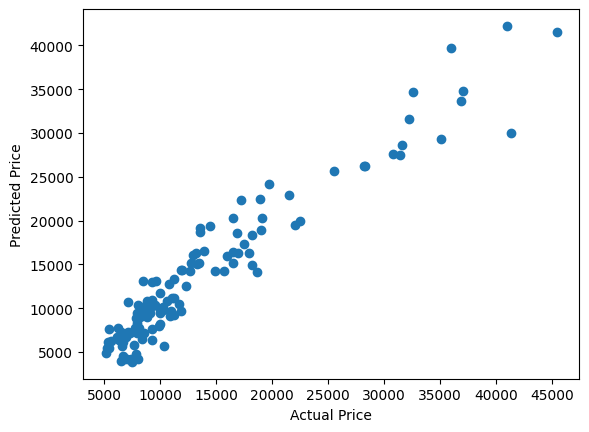

In [27]:
#Visualization
plt.scatter(y_train,training_data_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [28]:
#Prediction on test data
test_data_predicted = lin_reg_model.predict(x_test)
#R2 value calculation
R2_value=metrics.r2_score(y_test, test_data_predicted)
print("R2 value : ",R2_value)

R2 value :  0.6007558370664907


In [29]:
lass_reg_model=Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

In [30]:
#Prediction on training data
training_data_predicted = lass_reg_model.predict(x_train)
#R2 value calculation
R2_value=metrics.r2_score(y_train, training_data_predicted)
print("R2 value : ",R2_value)

R2 value :  0.9203621008637861


Text(0, 0.5, 'Predicted Price')

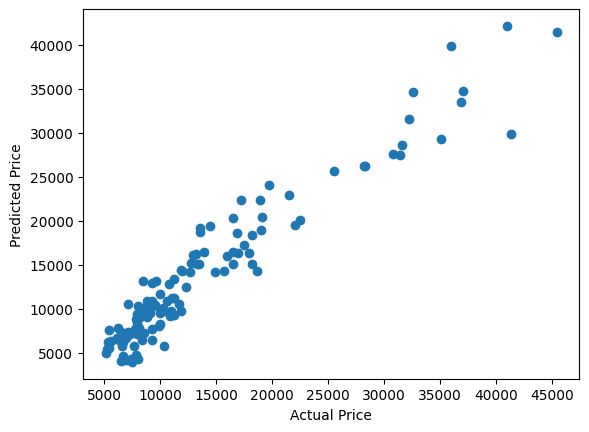

In [31]:
#Visualization
plt.scatter(y_train,training_data_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [32]:
#As linear regression is giving better R2 value, we're usuing it
lin_reg_model.fit(x,y)

LinearRegression()

In [33]:
lin_reg_model.score(x,y)


0.8843357288167984

Text(0, 0.5, 'Predicted Price')

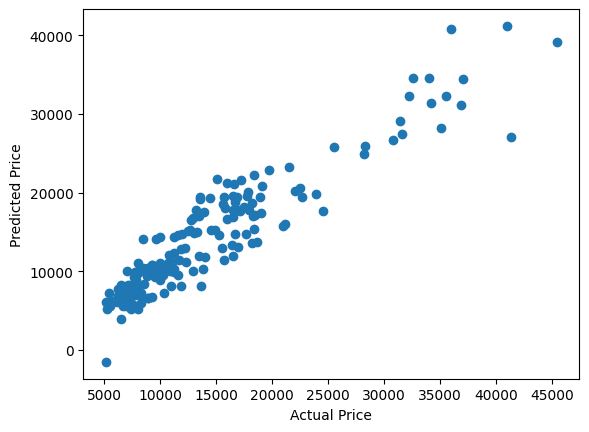

In [34]:
y_pred=lin_reg_model.predict(x)
#Visualization
plt.scatter(y,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

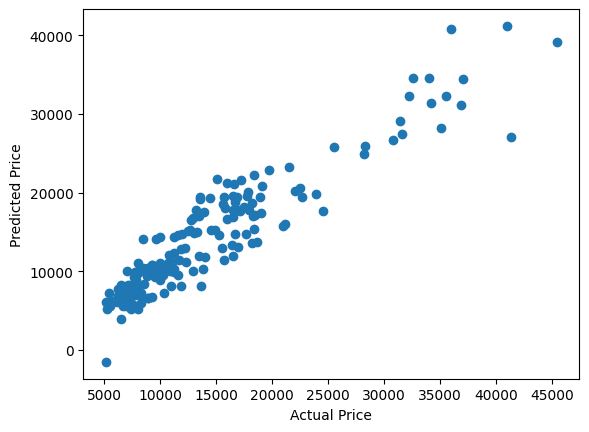

In [35]:
y_pred=lin_reg_model.predict(x)
#Visualization
plt.scatter(y,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [36]:
result={"Actual Price":y,"Predicted Price":y_pred}
pd.DataFrame(result).to_csv("Result.csv")

In [37]:
x1=data_new.drop(columns=['price'],axis=1)
y1=data_new['price']
lin_reg_model.fit(x1,y1)

LinearRegression()

In [38]:
lin_reg_model.score(x1,y1)

0.9958609792800798

In [39]:
y1_pred=lin_reg_model.predict(x1)
#R2 value calculation
R2_value=metrics.r2_score(y1, y1_pred)
print("R2 value : ",R2_value)

R2 value :  0.9958609792800798


Text(0, 0.5, 'Predicted Price')

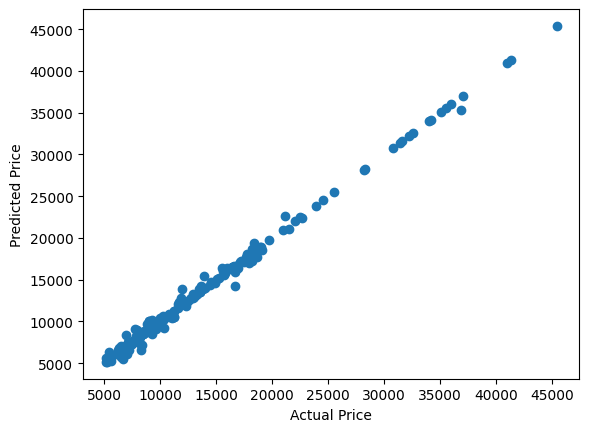

In [40]:
#Visualization
plt.scatter(y1,y1_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [41]:
result={"Actual Price":y1,"Predicted Price considering CarName":y1_pred}
pd.DataFrame(result).to_csv("Result.csv")

In [42]:
data['car_company'] = data['CarName'].apply(lambda x:x.split(' ')[0])

In [43]:
data['car_company'].replace('toyouta', 'toyota',inplace=True)
data['car_company'].replace('Nissan', 'nissan',inplace=True)
data['car_company'].replace('maxda', 'mazda',inplace=True)
data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
data['car_company'].replace('vw', 'volkswagen',inplace=True)
data['car_company'].replace('porcshce', 'porsche',inplace=True)

<ipython-input-44-f3ff93f261d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['wheelbase'])


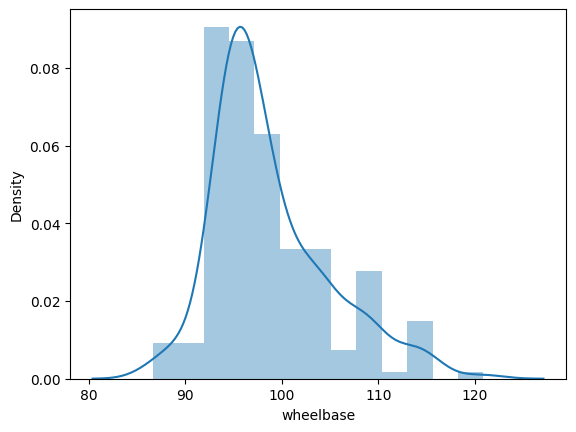

In [44]:
sns.distplot(data['wheelbase'])
plt.show()

<ipython-input-45-062983dc1d28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['carlength'])


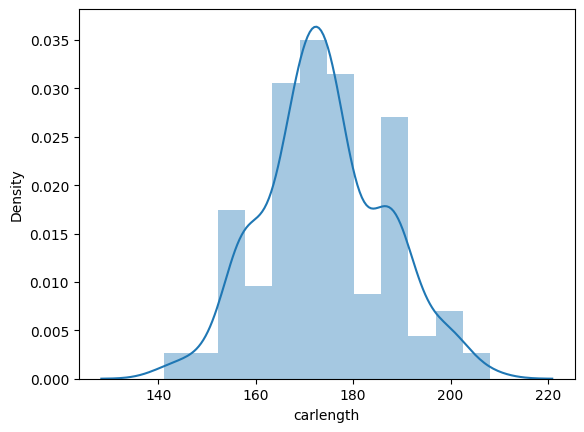

In [45]:
data['carlength'].value_counts().head()
sns.distplot(data['carlength'])
plt.show()

In [46]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

data['cylindernumber'] = data[['cylindernumber']].apply(convert_number)

In [47]:
cars_numeric = data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,4,1,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,4,1,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,2,1,1,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,4,0,0,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,4,0,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 3000x3000 with 0 Axes>

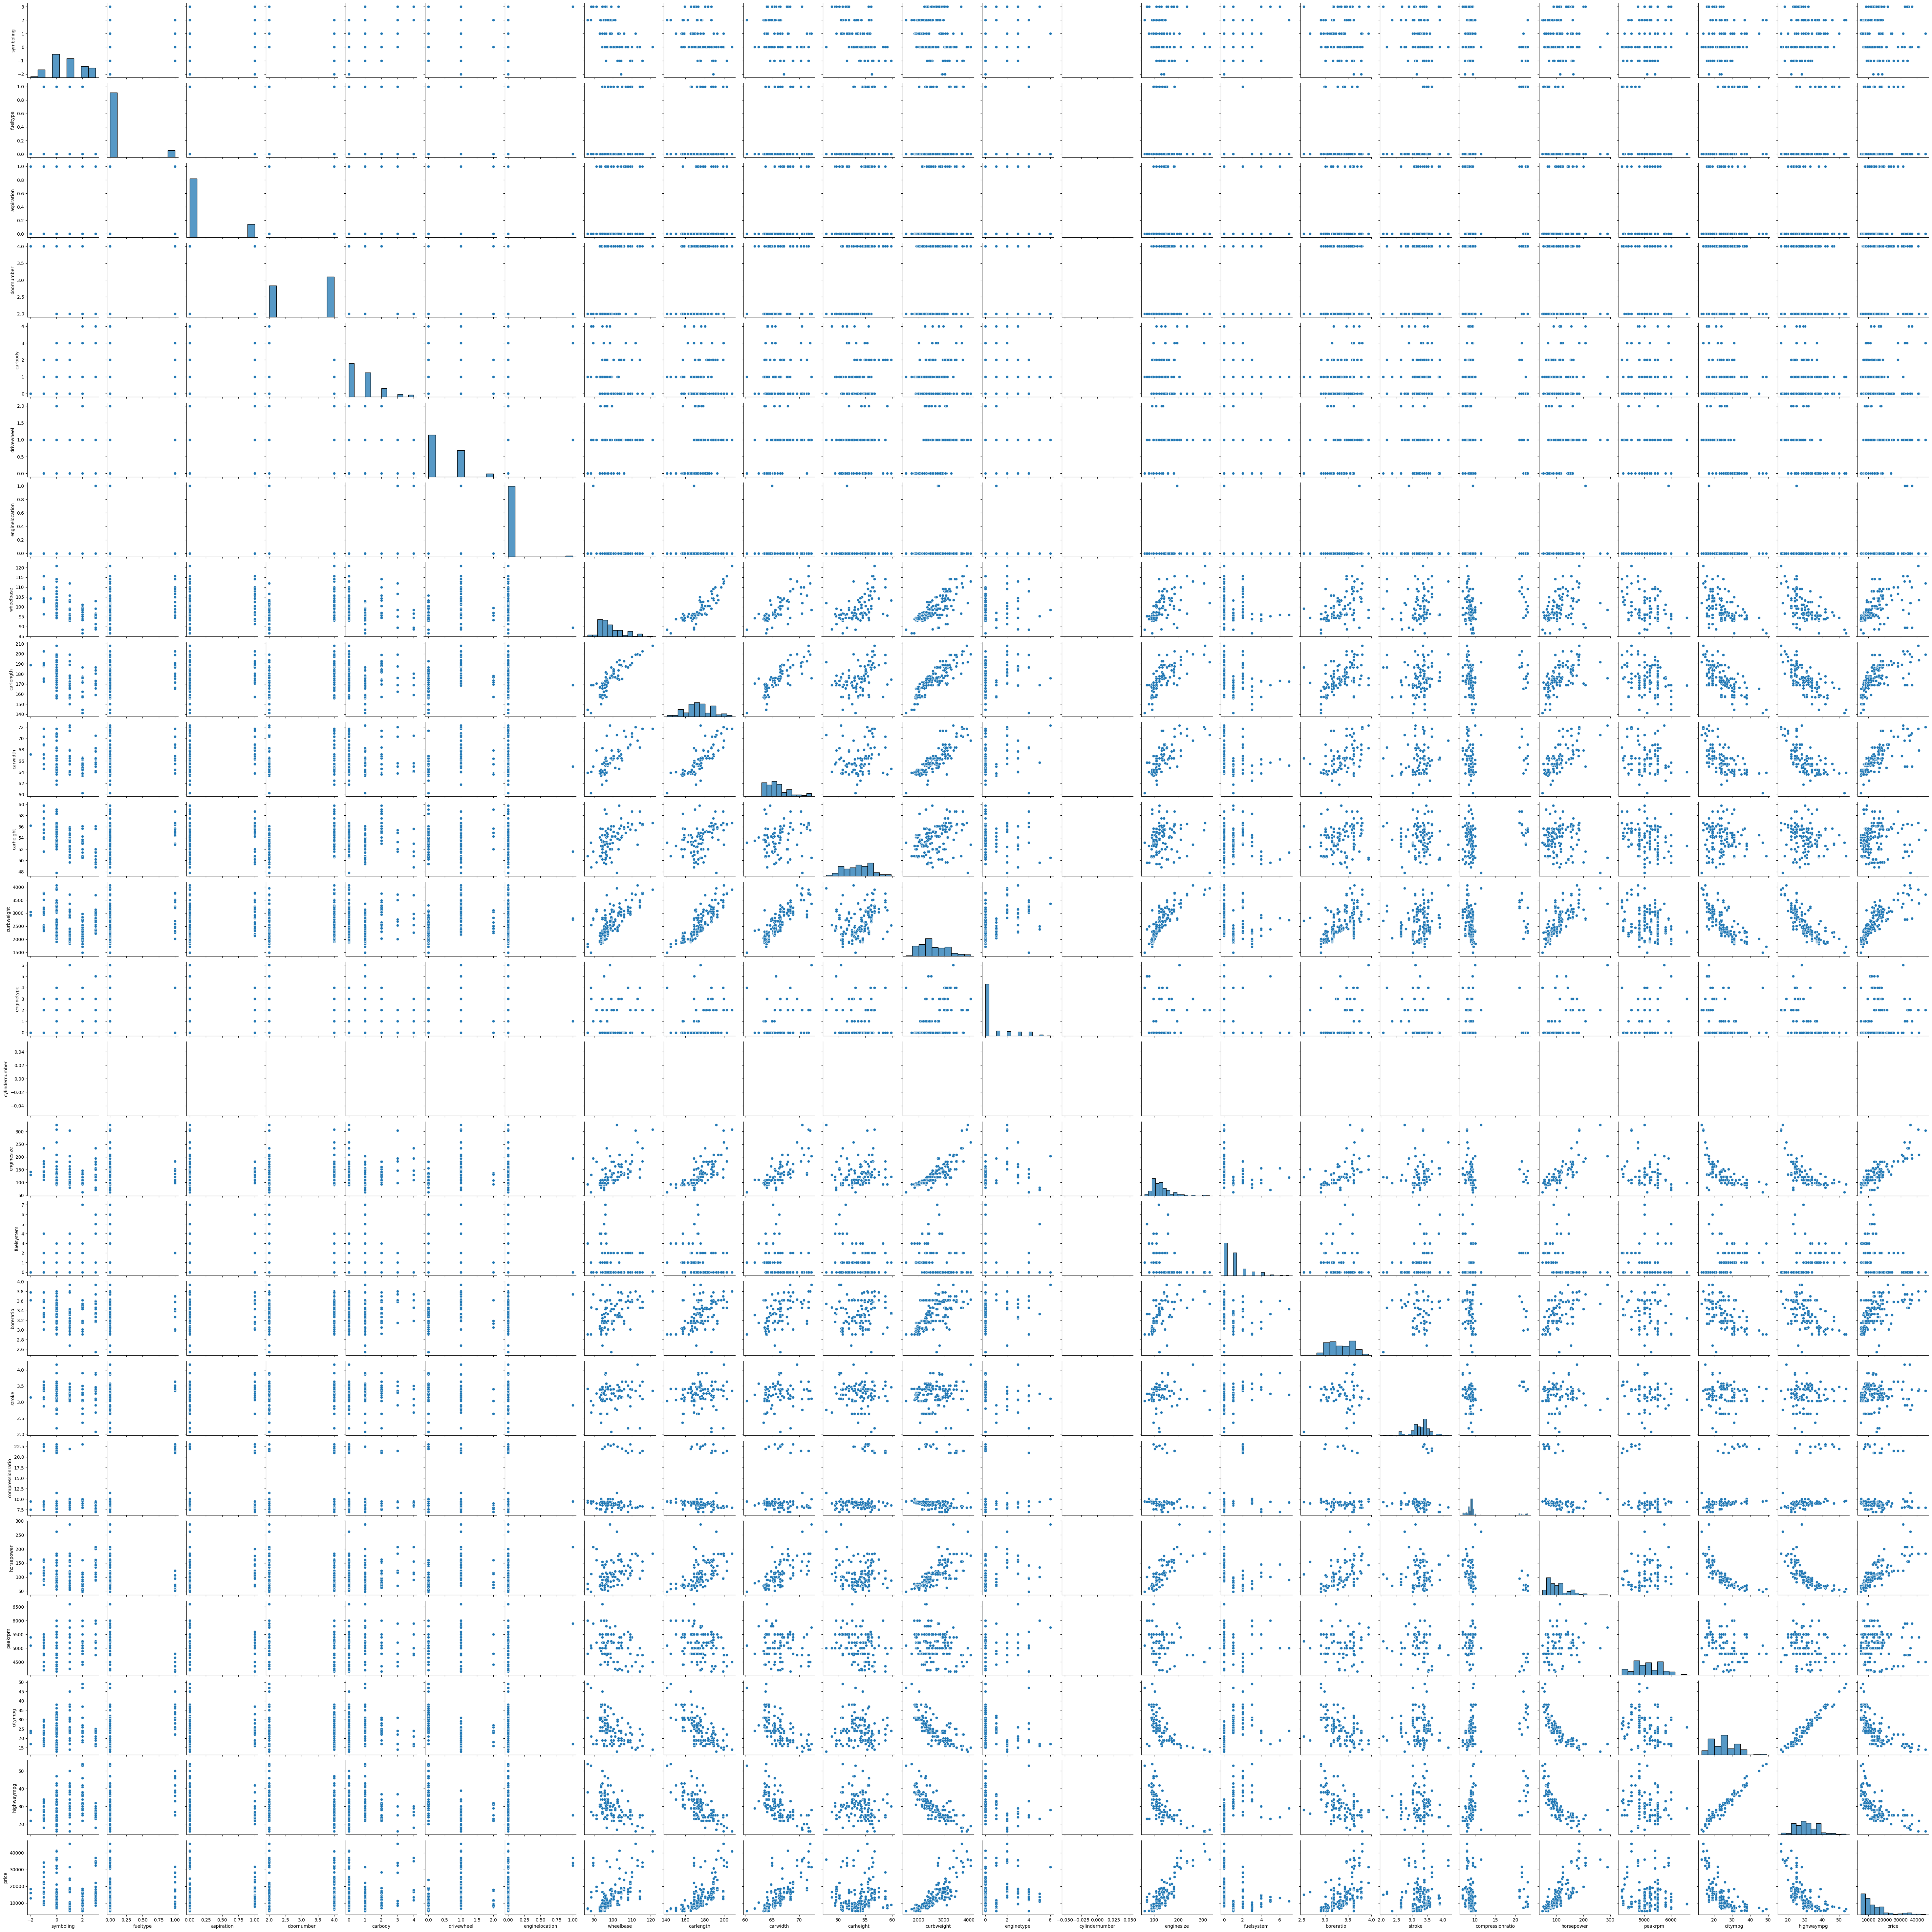

In [48]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

In [48]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

<Axes: xlabel='fuelsystem', ylabel='price'>

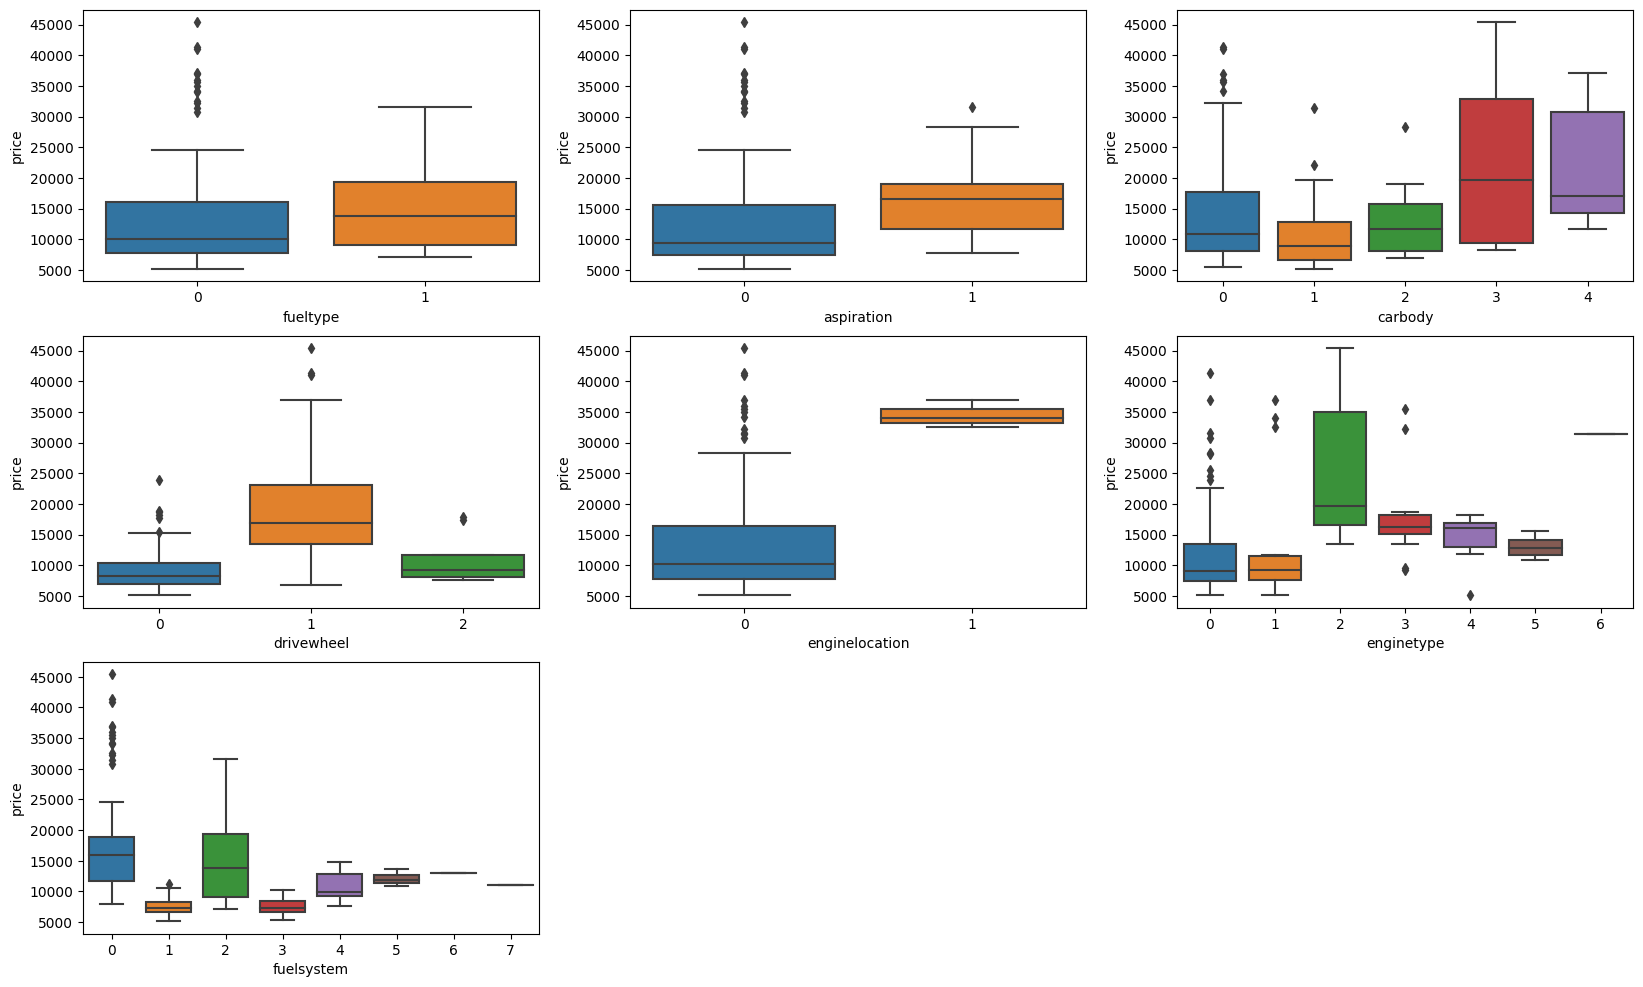

In [51]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)